In [6]:
import pandas as pd

df = pd.read_csv('df1F.csv')

print(df.head())


                                        Product Name    Price   Vendor Name  \
0  3 Gram Cocaine Powder High Quality 100% Pure (...  $120.00  FlexxCocaine   
1  10 Gram Cocaine Powder High Quality 100% Pure ...  $320.00  FlexxCocaine   
2  20 Gram Cocaine Powder High Quality 100% Pure ...  $560.00  FlexxCocaine   
3                           5 Gram Fishscale Cocaine  $150.00      hardcoke   
4                3 Gram Ultraclean 100% Pure Cocaine  $100.00        DAGO37   

  Category  
0  Cocaine  
1  Cocaine  
2  Cocaine  
3  Cocaine  
4  Cocaine  


In [7]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  130 non-null    object 
 1   Price         130 non-null    float64
 2   Vendor Name   130 non-null    object 
 3   Category      130 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.2+ KB
None


C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


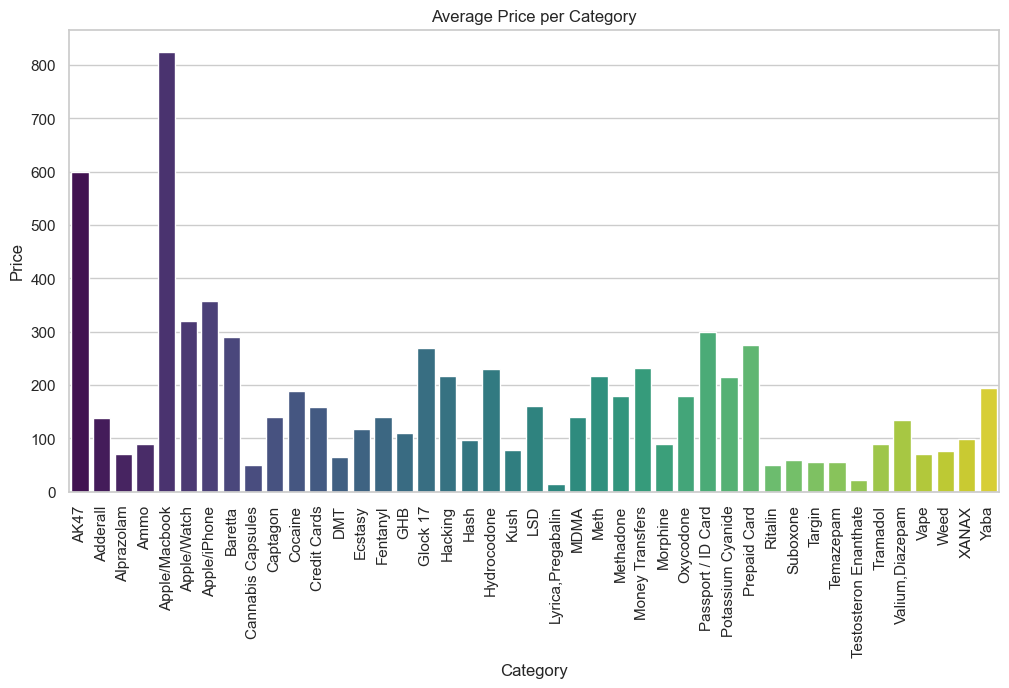

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
avg_price_category = df.groupby('Category')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Price', data=avg_price_category, palette="viridis")
plt.title('Average Price per Category')
plt.xticks(rotation=90)
plt.show()


C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


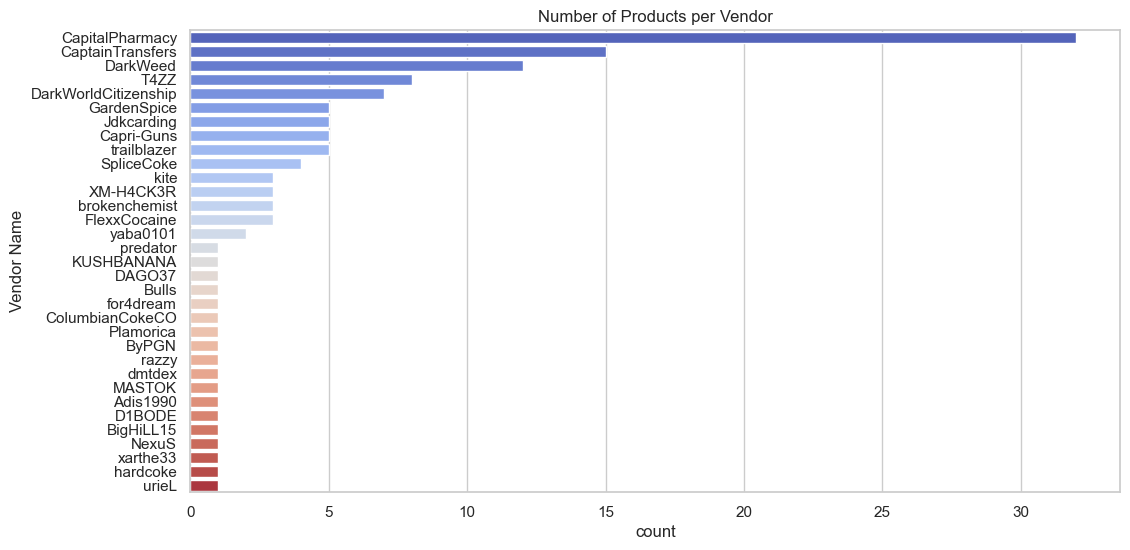

In [9]:
# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(y='Vendor Name', data=df, palette="coolwarm", order=df['Vendor Name'].value_counts().index)
plt.title('Number of Products per Vendor')
plt.show()


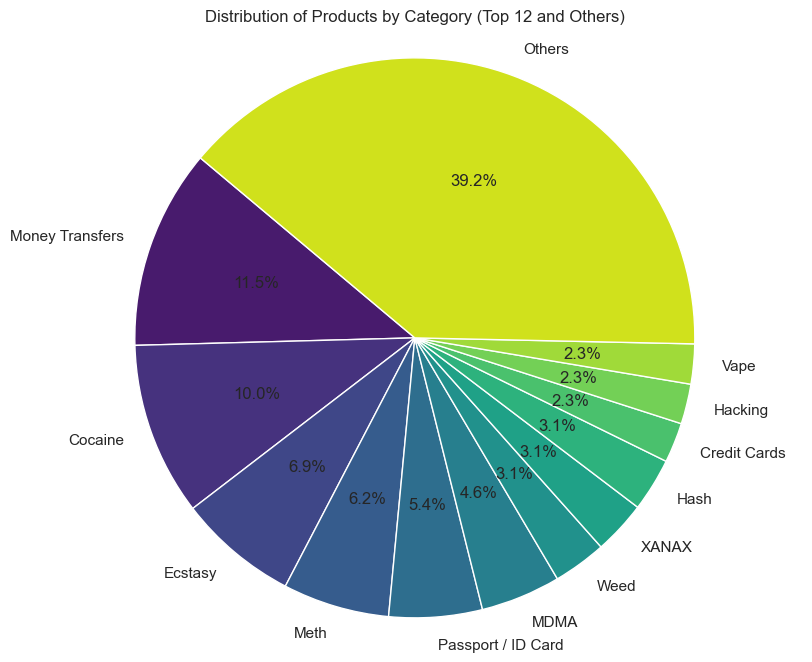

In [15]:
category_counts = df['Category'].value_counts()

top_5_categories = category_counts.nlargest(12)

other_categories_count = category_counts[12:].sum()

top_5_categories['Others'] = other_categories_count

plt.figure(figsize=(10, 8))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(top_5_categories)))
plt.title('Distribution of Products by Category (Top 12 and Others)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
